In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import PiecewiseAffineTransform, warp
from skimage import data

In [2]:
image = data.astronaut()
rows, cols = image.shape[0], image.shape[1]

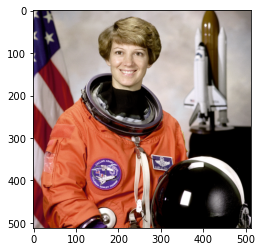

In [3]:
plt.imshow(image)

In [4]:
src_cols = np.linspace(0, cols, 20)
src_rows = np.linspace(0, rows, 10)
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

In [8]:
src_cols.shape, src_rows.shape, src.shape

((20, 10), (20, 10), (200, 2))

In [6]:
# add sinusoidal oscillation to row coordinates
dst_rows = src[:, 1] - np.sin(np.linspace(0, 3 * np.pi, src.shape[0])) * 50
dst_cols = src[:, 0]
dst_rows *= 1.5
dst_rows -= 1.5 * 50
dst = np.vstack([dst_cols, dst_rows]).T

In [7]:
dst_cols.shape, dst_rows.shape, dst.shape

((200,), (200,), (200, 2))

In [14]:
tform = PiecewiseAffineTransform()
tform.estimate(src, dst)

True

In [15]:
out_rows = image.shape[0] - 1.5 * 50
out_cols = cols
out = warp(image, tform, output_shape=(out_rows, out_cols))

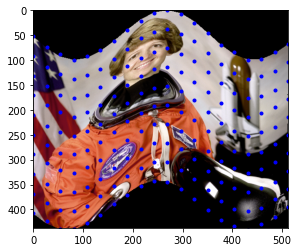

In [16]:
fig, ax = plt.subplots()
ax.imshow(out)
ax.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], '.b')
ax.axis((0, out_cols, out_rows, 0))
plt.show()

In [17]:
img = np.zeros([100,100,3],dtype=np.uint8)
img.fill(0) # or img[:] = 255
img[20:60, 20:80] = 255

pt1 = np.float32([[20,20],
               [80, 20],
               [20, 60],
               [80, 60]])

sensor_pt1 = np.float32([40,60])

In [18]:
img2 = np.zeros([100,100,3],dtype=np.uint8)
img2.fill(0) # or img[:] = 255
img2[20:60, 20:40] = 255

pt2 = np.float32([[40,20],
               [40, 60],
               [20, 60],
               [20, 20]])


In [19]:
tform = PiecewiseAffineTransform()
tform.estimate(pt1, pt2)

True

In [20]:
out = warp(img, tform)

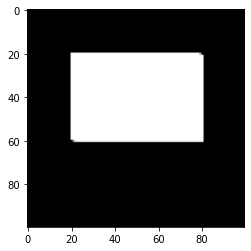

In [21]:
plt.imshow(out)

In [22]:
tform.inverse(sensor_pt1)

array([80., 20.])

In [42]:
rows, cols, ch = img.shape
dst = cv2.warpAffine(img, M, (cols, rows))

In [31]:
test_loc = np.append(sensor_pt1, np.float32(1))

In [46]:
np.dot(M, test_loc)

array([20.        , -6.66666667])